(0.0, 20.0)

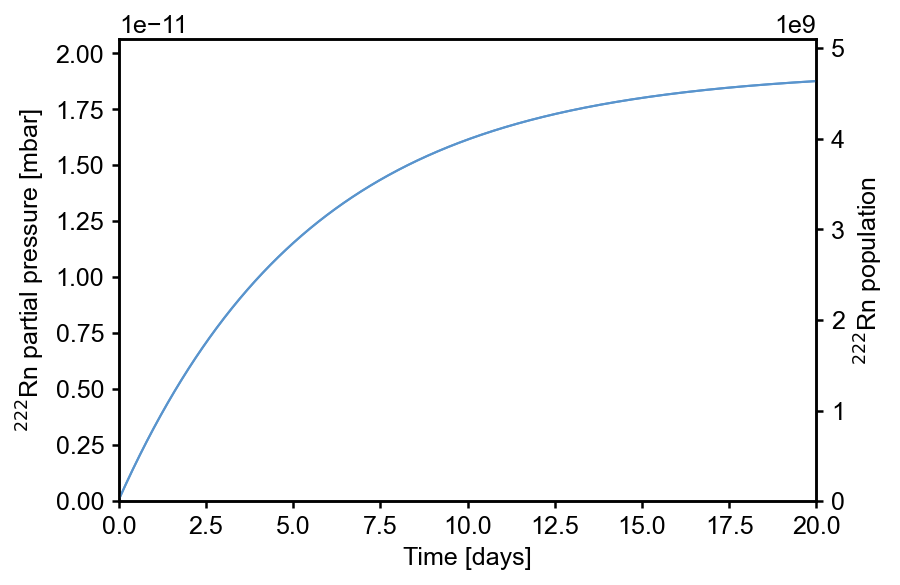

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

plt.style.use('thesis')
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams.update({'axes.prop_cycle': cycler(color=['#5994cd', '#d74164', '#4eaa76', '#d88300', '#7365cf', \
                                                      '#c85e3e', '#83a23e', '#c851b1', '#1850a1'])})

activity = 1e4 # activity of 226Ra in Bq
accum_time = 20*24*3600 # time Rn is allowed to accumulate in s
tau_Rn222 = 3.8215*24*3600/np.log(2) # lifetime of 222Rn in s

times = np.linspace(0, accum_time, 1000)
dt = times[1] - times[0]

N_Rn = np.zeros(len(times))

for i in range(len(times)):
    N_Rn[i] = N_Rn[i - 1] + activity*dt - N_Rn[i - 1]*dt/tau_Rn222

mbar_per_pa = 1e-2 # 0.01 mbar per Pa (1 mbar = 100 Pa, so 1 Pa = 0.01 mbar)
m3_per_L = 1e-3

k_B = 1.380649e-23 # Boltzmann's constant, J/K

T = 293. # temperature in K
V_chamber = 10*m3_per_L # volume of the chamber in L

pressure = N_Rn*k_B*T/V_chamber*mbar_per_pa

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(times/3600/24, pressure)
ax.set_ylim([0, 1.1*np.amax(pressure)])
ax2 = ax.twinx()
ax2.plot(times/3600/24, N_Rn)
ax2.set_ylim([0, 1.1*np.amax(N_Rn)])
ax2.set_ylabel('$^{222}$Rn population')
ax.set_xlabel('Time [days]')
ax.set_ylabel('$^{222}$Rn partial pressure [mbar]')
ax.set_xlim([0, np.amax(times)/3600/24])